#### Writer : 20141445 Kim JeongMin

In [1]:
import numpy as np
import matplotlib.pyplot as pp
import math

##### choose a polynomial curve :

$$ f(x) = 0.02 * x^5 + x^4 + x^3 - 20 * x^2 + 400 * x $$

In [2]:
def orig_function(x):
    return (0.02)*np.power(x,5) + np.power(x,4) + np.power(x,3) - 20* np.power(x,2) - 400*x

##### define a domain of function

In [3]:
domain = np.arange(-30, 31, 0.1)

##### plot the function

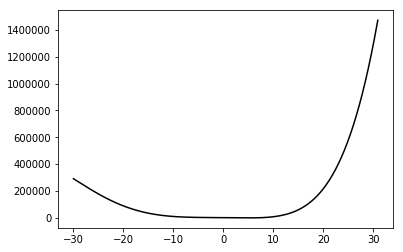

In [4]:
pp.plot(domain, orig_function(domain), 'black')
pp.show()

##### generate points along the curve with random noise

In [5]:
def noise_function(x):
    return orig_function(x) + (np.random.rand(1)[0] - 0.5) * 1000000

##### plot the generated noisy points along with its original polynomial without noise

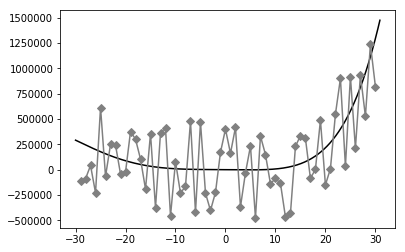

In [6]:
xs = [];
ys = [];
for i in range(0, 60):
    xs.append(i - 29)
    ys.append(noise_function(i-29))
pp.plot(domain, orig_function(domain), 'black')
pp.plot(xs, ys, color='gray', marker='D')
pp.show()

In [7]:
def make_tall_matrix(dimension, xs):
    matrix = np.empty([len(xs), dimension+1])
    for i in range(0,len(xs)):
        for j in range(0,dimension+1):
            matrix[i][j] = np.power(xs[i], j)
    return matrix

In [8]:
def make_coefficient_vector(dimension, xs, ys):
    return np.matmul(np.linalg.pinv(make_tall_matrix(dimension, xs)), ys)

In [9]:
def approx_poly_function(coefficients):
    dimension = len(coefficients)
    result = 0
    def result_function(x):
        res = 0
        for i in range(0, dimension):
            res += coefficients[i] * np.power(x, i)
        return res
    return result_function

##### plot the approximating polynomial curve obtained by solving a least square problem
##### plot the approximating polynomial curve with varying polynomial degree

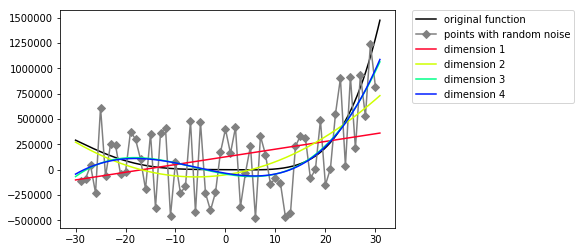

In [10]:
NUM_COLORS = 5
color_map = pp.get_cmap('gist_rainbow', NUM_COLORS)

pp.plot(domain, orig_function(domain), 'black', label="original function")
pp.plot(xs, ys, color='gray', marker='D', label="points with random noise")
for dim in range(1,5):
    pp.plot(domain, approx_poly_function(make_coefficient_vector(dim, xs, ys))(domain), color=color_map((dim-1)/NUM_COLORS), label="dimension " + str(dim))
pp.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pp.show()